# 패션 MNISST

In [7]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

In [10]:
print(train_input.shape, train_target.shape) # 6만개의 샘플과 28*28픽셀로 되어있는 이미지 데이터

(60000, 28, 28) (60000,)


In [9]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


# 입력과 타깃 샘플

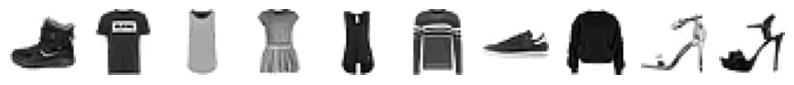

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r') # gray_r 반전 - 숫자가높을수록 검은색
    axs[i].axis('off')
plt.show()

In [13]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [16]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


# 로지스틱 회귀

In [17]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
print(train_scaled.shape)

(60000, 784)


In [22]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score'])) 
# test_score지만 입력한건 훈련데이터, 훈련데이터를 검증과 훈련으로 나누어서 교차검증폴드의 평균값 낸것

0.8192833333333333


# 인공 신경망

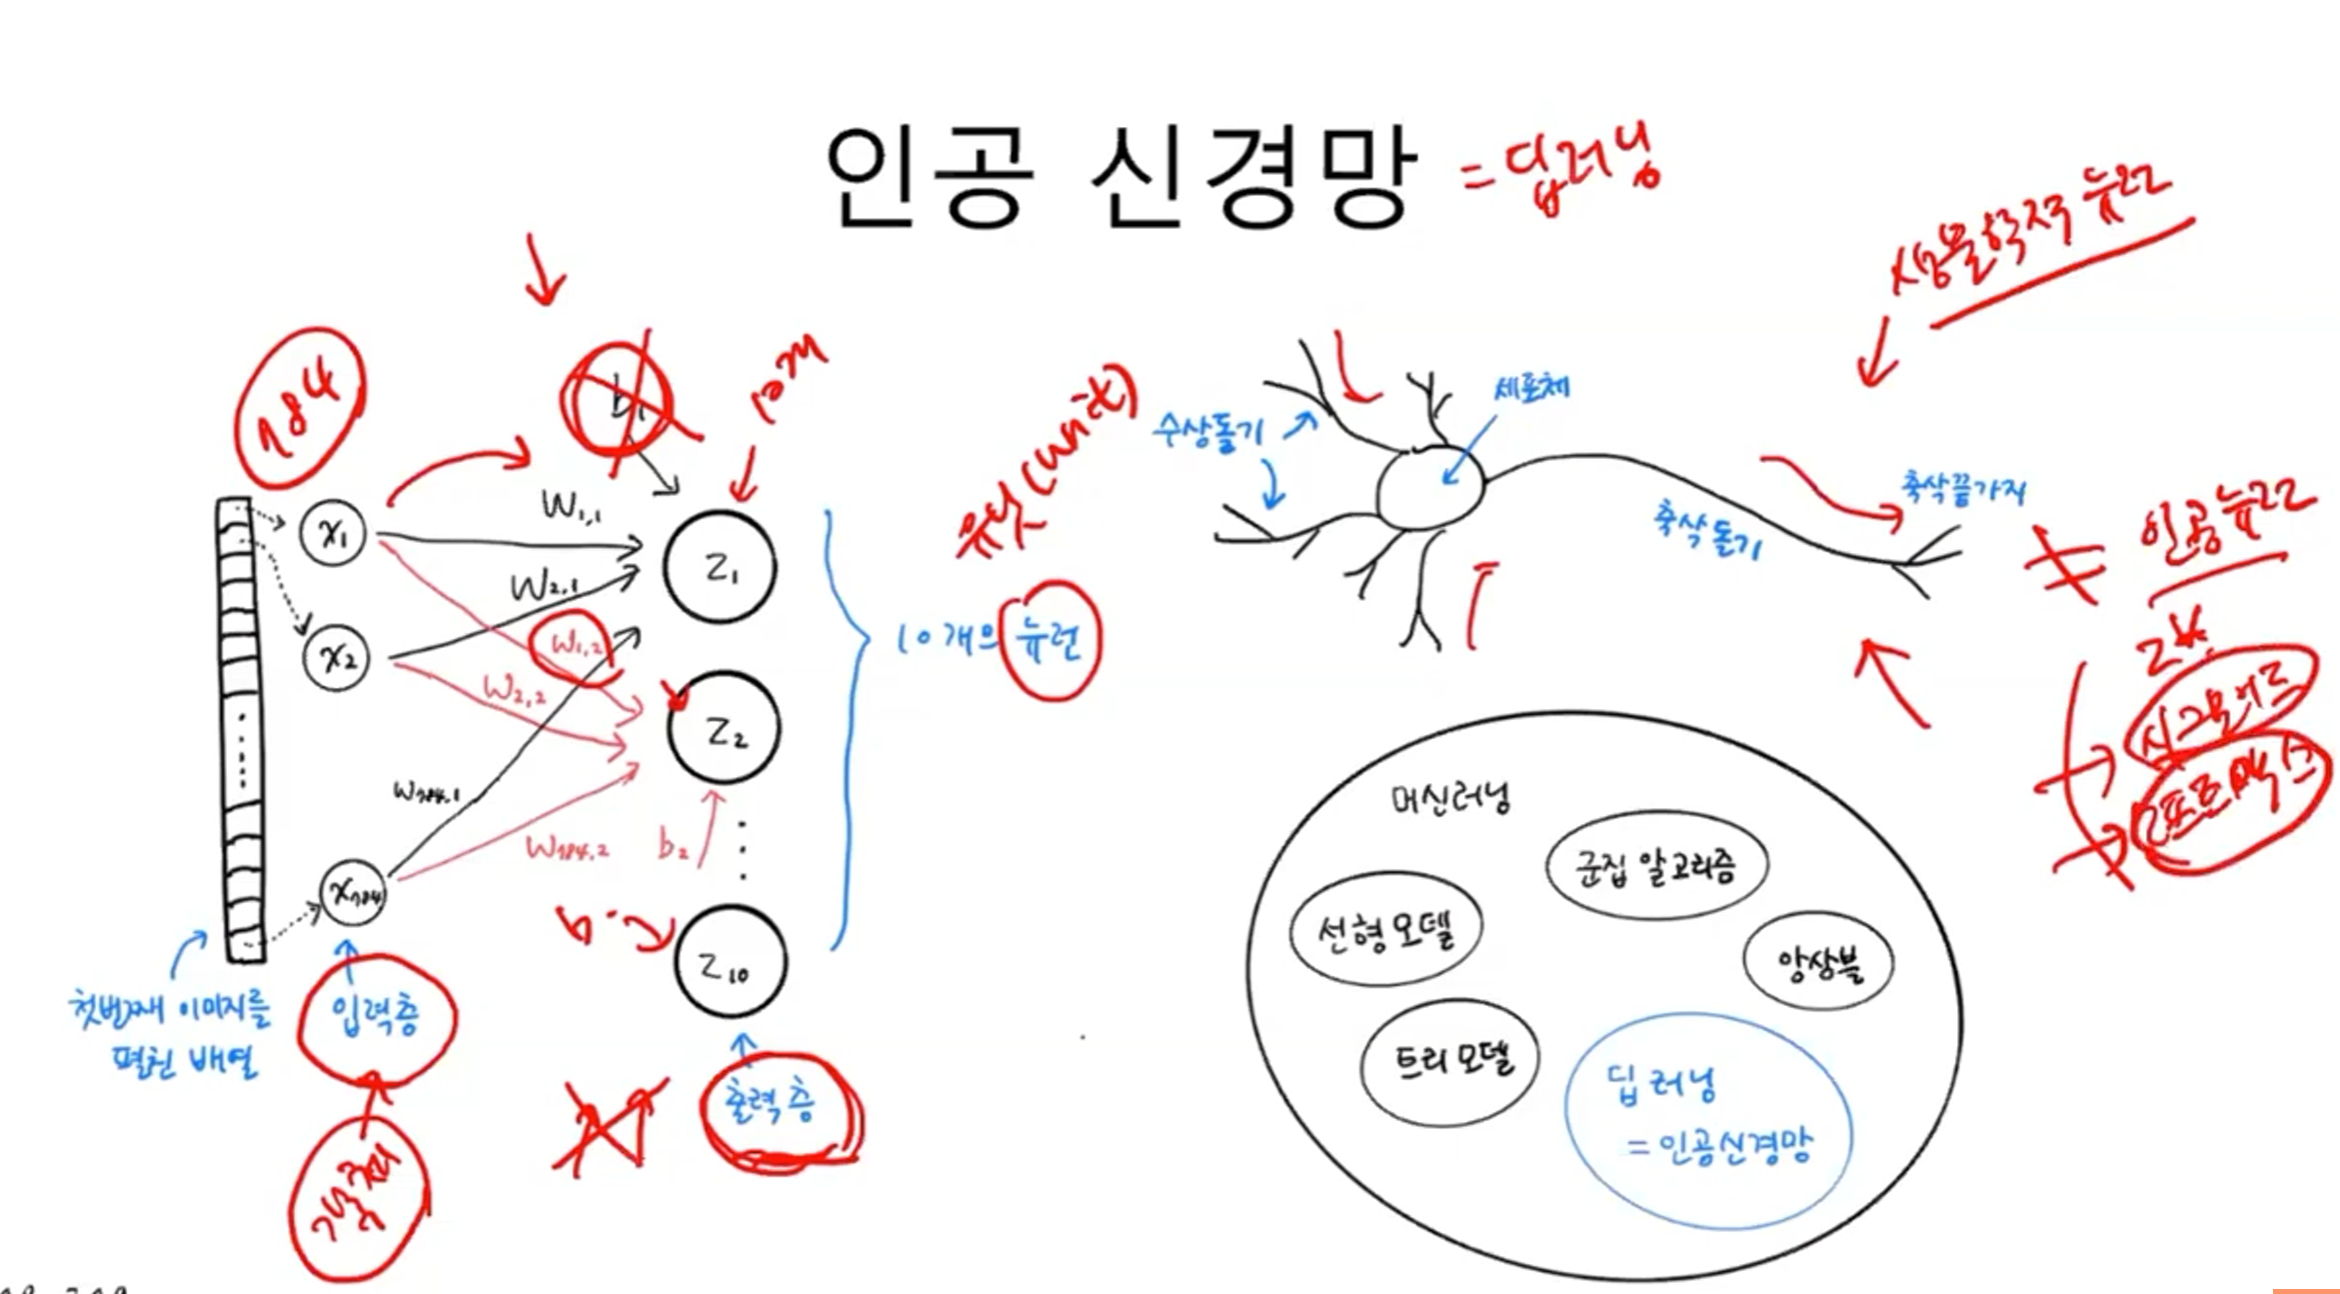

# 텐서플로와 케라스
- 텐서플로는 구글이 2015년 11월 오픈소스로 공개한 라이브러리.
- 파이토치는 페이스북이

In [24]:
import tensorflow as tf
from tensorflow import keras

# 케라스 모델 만들기

In [25]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [26]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [27]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [30]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# keras.layers 패키지 안에는 다양한 층이 있다. 그중 가장 기본이 되는 Dense 밀집층

In [31]:
model = keras.Sequential(dense)

# 모델 설정

In [32]:
model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy')

In [33]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


# 모델 훈련

In [34]:
model.fit(train_scaled, train_target, epochs= 5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6111 - accuracy: 0.7920
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4753 - accuracy: 0.8393
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4495 - accuracy: 0.8484
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4375 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4301 - accuracy: 0.8548


In [36]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 889us/step - loss: 0.4439 - accuracy: 0.8489


[0.44390198588371277, 0.8489166498184204]

# 사이킷런-케라스 비교
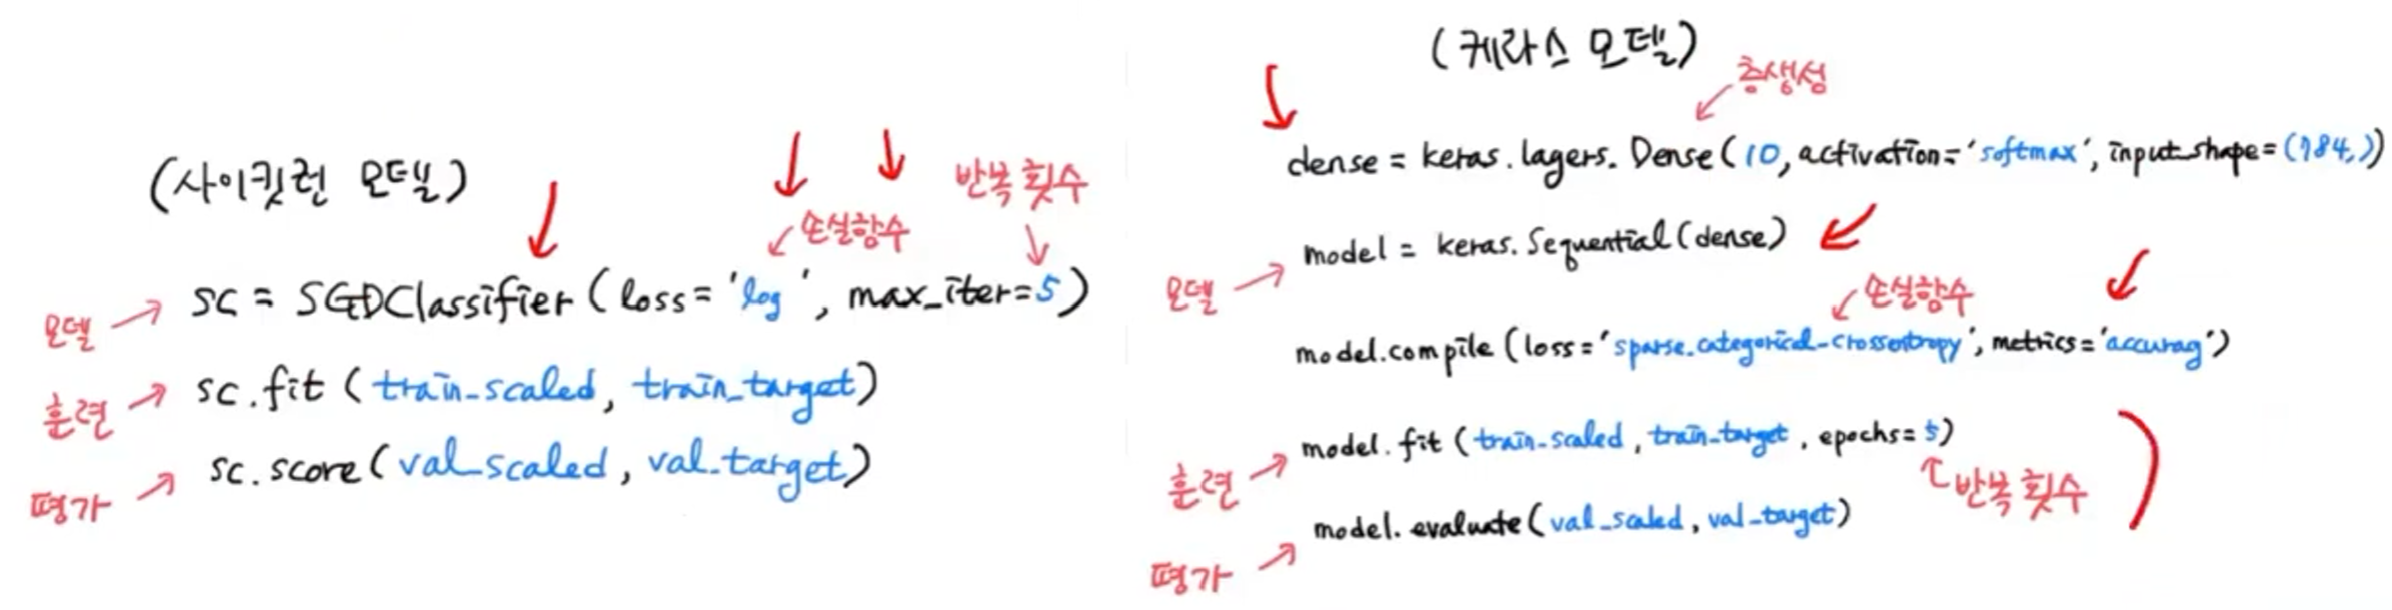